In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

import pprint

In [3]:
data_tree = {}
with open('../data/all-tree.pickle','rb') as f:
    data_tree = pickle.load(f)
#     data_tree = unpickler.load()

ModuleNotFoundError: No module named 'CS765'

In [4]:
data_csv = pd.read_csv('../data/all-nodes.csv')
data_csv.head()

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
0,0,root,0,9354832,0,85,[],"[1, 2, 4, 10, 19, 22, 30, 34, 41, 44, 55, 60, ...",0,[]
1,1,Books,1940253,2370585,0,32,['Books'],"[45, 49, 52, 111, 118, 123, 134, 142, 155, 185...",0,[]
2,2,Movies & TV,1251,208321,0,2,['Movies & TV'],"[3, 27]",0,[]
3,3,Movies,142126,142126,2,0,"['Movies & TV', 'Movies']",[],428,"[(27, 591), (28, 552), (164, 526), (294, 341),..."
4,4,"Clothing, Shoes & Jewelry",0,1503384,0,225,"['Clothing, Shoes & Jewelry']","[5, 6, 231, 237, 379, 992, 1538, 1646, 1647, 1...",0,[]


In [5]:
data_csv.head(10)

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
0,0,root,0,9354832,0,85,[],"[1, 2, 4, 10, 19, 22, 30, 34, 41, 44, 55, 60, ...",0,[]
1,1,Books,1940253,2370585,0,32,['Books'],"[45, 49, 52, 111, 118, 123, 134, 142, 155, 185...",0,[]
2,2,Movies & TV,1251,208321,0,2,['Movies & TV'],"[3, 27]",0,[]
3,3,Movies,142126,142126,2,0,"['Movies & TV', 'Movies']",[],428,"[(27, 591), (28, 552), (164, 526), (294, 341),..."
4,4,"Clothing, Shoes & Jewelry",0,1503384,0,225,"['Clothing, Shoes & Jewelry']","[5, 6, 231, 237, 379, 992, 1538, 1646, 1647, 1...",0,[]
5,5,Girls,19160,78291,4,6,"['Clothing, Shoes & Jewelry', 'Girls']","[16, 5066, 8274, 9832, 9842, 11014]",995,"[(1538, 7675), (2161, 3164), (231, 2244), (503..."
6,6,"Novelty, Costumes & More",922,466352,4,12,"['Clothing, Shoes & Jewelry', 'Novelty, Costum...","[7, 74, 235, 391, 503, 1986, 2359, 3960, 6768,...",60,"[(9857, 179), (231, 108), (237, 36), (5, 28), ..."
7,7,Costumes & Accessories,5945,50542,6,6,"['Clothing, Shoes & Jewelry', 'Novelty, Costum...","[8, 558, 946, 2068, 3488, 12339]",323,"[(3456, 2064), (236, 846), (2359, 697), (231, ..."
8,8,More Accessories,3297,8647,7,3,"['Clothing, Shoes & Jewelry', 'Novelty, Costum...","[9, 8357, 10892]",99,"[(236, 472), (5, 213), (1538, 194), (211, 58),..."
9,9,Kids & Baby,2249,2249,8,0,"['Clothing, Shoes & Jewelry', 'Novelty, Costum...",[],24,"[(5, 348), (1538, 204), (236, 71), (949, 18), ..."


In [4]:
data_csv.shape

(29241, 10)

## Name

In [18]:
len(data_csv.name.unique())

18369

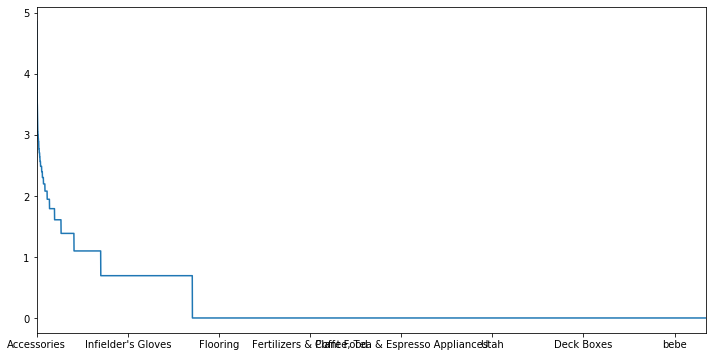

In [24]:
np.log(pd.value_counts(data_csv.name)).plot(figsize=(12,6))

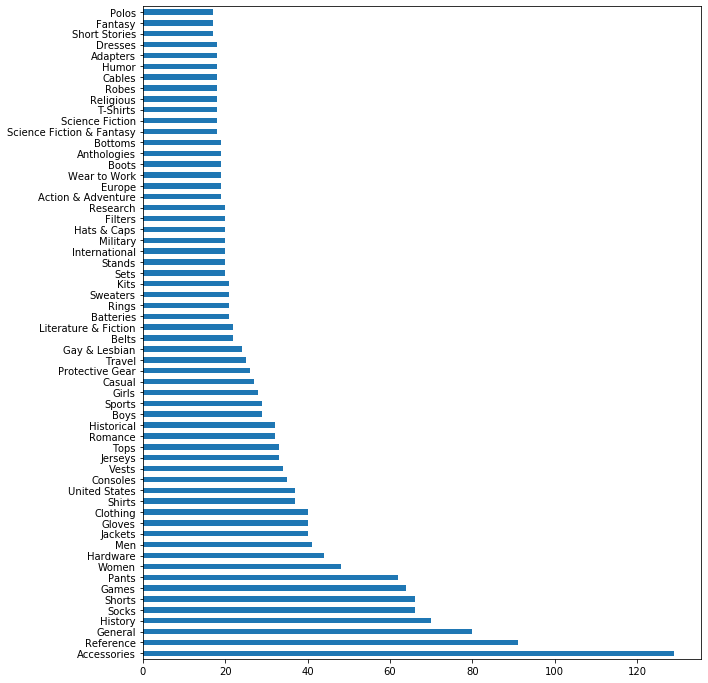

In [19]:
pd.value_counts(data_csv.name)[:60].plot.barh(figsize=(10,12))

## Children

In [34]:
np.sort(data_csv.numChildren)[::-1][:30]

array([225,  90,  85,  80,  78,  73,  73,  65,  61,  54,  54,  54,  53,
        49,  48,  47,  46,  42,  41,  40,  40,  39,  38,  38,  38,  38,
        37,  37,  37,  36])

## Path

In [35]:
len(data_csv.pathName.unique())

29241

In [36]:
path_lengths = [len(p) for p in data_csv.pathName]
np.sort(path_lengths)[::-1][:10]

array([197, 196, 195, 194, 194, 194, 189, 189, 188, 188])

(array([   9.,   18.,   70.,  143.,  288.,  548., 1401., 1436., 1932.,
        2061., 2786., 2726., 3218., 2519., 2629., 1879., 1728., 1218.,
         923.,  593.,  431.,  202.,  169.,   81.,   80.,   53.,   65.,
          19.,   10.,    6.]),
 array([  2. ,   8.5,  15. ,  21.5,  28. ,  34.5,  41. ,  47.5,  54. ,
         60.5,  67. ,  73.5,  80. ,  86.5,  93. ,  99.5, 106. , 112.5,
        119. , 125.5, 132. , 138.5, 145. , 151.5, 158. , 164.5, 171. ,
        177.5, 184. , 190.5, 197. ]),
 <a list of 30 Patch objects>)

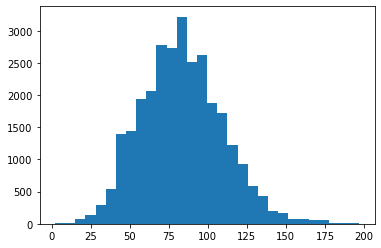

In [39]:
plt.hist(path_lengths,bins=30)

-------

In [40]:
data_csv.loc[data_csv.id == 1538,:]

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
1538,1538,Boys,16768,60338,4,6,"['Clothing, Shoes & Jewelry', 'Boys']","[2194, 8193, 8227, 9190, 12478, 16177]",837,"[(5, 7675), (2161, 3991), (12441, 1840), (3441..."


In [41]:
data_csv.loc[data_csv.id == 837,:]

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
837,837,Round Ring Binders,431,431,836,0,"['Office Products', 'Office & School Supplies'...",[],2,"[(1261, 1), (4891, 1)]"


In [80]:
len(data_csv.loc[data_csv.id == 837,'pathName'].values[0])

109

In [58]:
data_csv.children.loc[data_csv.id < 10]

0    [1, 2, 4, 10, 19, 22, 30, 34, 41, 44, 55, 60, ...
1    [45, 49, 52, 111, 118, 123, 134, 142, 155, 185...
2                                              [3, 27]
3                                                   []
4    [5, 6, 231, 237, 379, 992, 1538, 1646, 1647, 1...
5                  [16, 5066, 8274, 9832, 9842, 11014]
6    [7, 74, 235, 391, 503, 1986, 2359, 3960, 6768,...
7                     [8, 558, 946, 2068, 3488, 12339]
8                                     [9, 8357, 10892]
9                                                   []
Name: children, dtype: object

In [72]:
children_counts = [len(data_csv.children.loc[data_csv.id ==i].values[0]) for i in data_csv.id]
children_counts = np.array(children_counts)

(array([2.433e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.100e+01, 0.000e+00, 9.600e+01, 2.250e+02, 0.000e+00, 0.000e+00,
        3.300e+01, 2.490e+02, 7.040e+02, 1.000e+01, 1.590e+02, 6.580e+02,
        1.060e+02, 5.370e+02, 1.420e+02, 3.030e+02, 1.580e+02, 2.610e+02,
        2.440e+02, 2.160e+02, 1.850e+02, 1.260e+02, 1.260e+02, 9.200e+01,
        7.800e+01, 5.000e+01, 4.900e+01, 2.500e+01, 2.600e+01, 1.100e+01,
        9.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.69314718, 0.82522606, 0.95730493, 1.08938381, 1.22146269,
        1.35354156, 1.48562044, 1.61769932, 1.74977819, 1.88185707,
        2.01393595, 2.14601482, 2.2780937 , 2.41017257, 2.54225145,
        2.67433033, 2.8064092 , 2.93848808, 3.07056696, 3.20264583,
        3.33472471, 3.46680359, 3.59888246, 3.73096134, 3.86304022,
        3.99511909, 4.12719797, 4.25

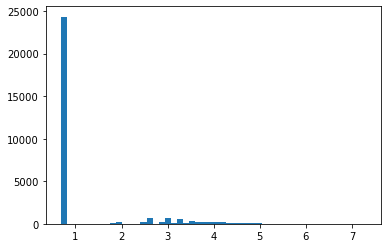

In [73]:
plt.hist(np.log(children_counts),bins=50)

(array([3.022e+03, 1.148e+03, 3.820e+02, 1.750e+02, 8.100e+01, 3.700e+01,
        2.800e+01, 7.000e+00, 1.000e+01, 4.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   5.  ,   34.42,   63.84,   93.26,  122.68,  152.1 ,  181.52,
         210.94,  240.36,  269.78,  299.2 ,  328.62,  358.04,  387.46,
         416.88,  446.3 ,  475.72,  505.14,  534.56,  563.98,  593.4 ,
         622.82,  652.24,  681.66,  711.08,  740.5 ,  769.92,  799.34,
         828.76,  858.18,  887.6 ,  917.02,  946.44,  975.86, 1005.28,
        1034.7 , 1064

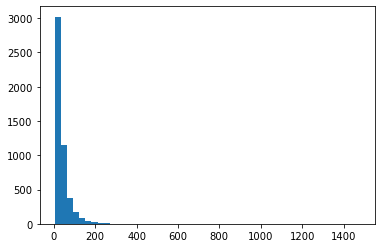

In [78]:
plt.hist(children_counts[children_counts > 2],bins=50)

## Alsos

In [81]:
data_csv.head()

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
0,0,root,0,9354832,0,85,[],"[1, 2, 4, 10, 19, 22, 30, 34, 41, 44, 55, 60, ...",0,[]
1,1,Books,1940253,2370585,0,32,['Books'],"[45, 49, 52, 111, 118, 123, 134, 142, 155, 185...",0,[]
2,2,Movies & TV,1251,208321,0,2,['Movies & TV'],"[3, 27]",0,[]
3,3,Movies,142126,142126,2,0,"['Movies & TV', 'Movies']",[],428,"[(27, 591), (28, 552), (164, 526), (294, 341),..."
4,4,"Clothing, Shoes & Jewelry",0,1503384,0,225,"['Clothing, Shoes & Jewelry']","[5, 6, 231, 237, 379, 992, 1538, 1646, 1647, 1...",0,[]


In [83]:
data_csv.loc[data_csv.id== 27,:]

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
27,27,TV,65535,65535,2,0,"['Movies & TV', 'TV']",[],484,"[(297, 3021), (294, 2942), (164, 1526), (574, ..."


In [85]:
list(data_csv.children.loc[data_csv.id == 0])

['[1, 2, 4, 10, 19, 22, 30, 34, 41, 44, 55, 60, 61, 64, 69, 82, 86, 95, 103, 107, 148, 152, 153, 356, 389, 412, 456, 742, 786, 819, 820, 947, 1316, 1334, 1426, 1674, 1882, 2493, 2551, 3065, 5137, 5284, 5739, 6090, 10159, 13065, 16717, 17257, 17720, 19557, 19566, 19568, 19572, 19574, 19576, 19582, 19585, 19592, 19594, 19601, 19604, 19610, 19618, 19622, 19626, 19636, 19639, 19641, 19648, 19658, 21030, 21361, 26423, 26730, 26851, 27590, 27863, 28279, 28309, 28340, 28341, 28522, 28550, 28913, 29009]']

In [90]:
len(eval((data_csv.children.loc[data_csv.id == 0])[0]))

85

In [94]:
data_csv.tail(1).pathName

29240    ['Kindle Store', 'Kindle eBooks', 'Nonfiction'...
Name: pathName, dtype: object

## All Children

In [119]:
eval(list(data_csv.children[data_csv.id == 1])[0])[0]

45

In [123]:
def all_children(id):
    while id != None:
        print(id)
        children = eval(list(data_csv.children[data_csv.id == id])[0])
        if len(children) > 0:
            id = children[0]
        else:
            break
            
all_children(1)

1
45
46
47
48


In [129]:
data_csv.loc[data_csv.id == 27]

,id,name,productCount,subtreeProductCount,parent,numChildren,pathName,children,alsoCount,also
27,27,TV,65535,65535,2,0,"['Movies & TV', 'TV']",[],484,"[(297, 3021), (294, 2942), (164, 1526), (574, ..."


In [137]:
data_csv.parent[data_csv.id == 27].values[0]

2

In [148]:
def find_all_parent(id):
    while id != None:
        cat_name = data_csv.name[data_csv.id == id].values[0]
        parent_id = data_csv.parent[data_csv.id == id].values[0]
        print(id,cat_name)
        id = parent_id
        if id == 0:
            print(id,'root')
            break
find_all_parent(27)

27 TV
2 Movies & TV
0 root


In [149]:
def find_all_hier(cat_name):
    all_cat_ids = data_csv.id.loc[data_csv.name == cat_name].values
    for cat_id in all_cat_ids:
        find_all_parent(cat_id)
        print("#####"*20)

In [150]:
find_all_hier("Boots")

7519 Boots
1417 Shoes
237 Men
4 Clothing, Shoes & Jewelry
0 root
####################################################################################################
7520 Boots
7480 Shoes
7479 Surf, Skate & Street
237 Men
4 Clothing, Shoes & Jewelry
0 root
####################################################################################################
8194 Boots
8193 Shoes
1538 Boys
4 Clothing, Shoes & Jewelry
0 root
####################################################################################################
8326 Boots
5066 Shoes
5 Girls
4 Clothing, Shoes & Jewelry
0 root
####################################################################################################
8498 Boots
1648 Shoes
231 Women
4 Clothing, Shoes & Jewelry
0 root
####################################################################################################
9525 Boots
2062 Downhill Skiing
2061 Skiing
2060 Snow Sports
10 Sports & Outdoors
0 root
###################################################